In [3]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import os

np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [4]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"] == "TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [11]:
datapath = os.path.join("datasets", "lifesat", "")

# Load the data
oecd_bli = pd.read_csv(datapath + "oecd_bli.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.xls",
                             thousands=',',
                             delimiter='\t',
                             encoding='latin1', 
                             na_values="n/a")

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)

In [12]:
country_stats.head()

,GDP per capita,Life satisfaction
Country,,
Mexico,9009.280,6.6
Russia,9054.914,6.0
Turkey,9437.372,5.5
Hungary,12239.894,5.3
Chile,13340.905,6.7


Cyprus - GPD per capita: 22587.49, Predicted life satisfaction: 6.184457826248521


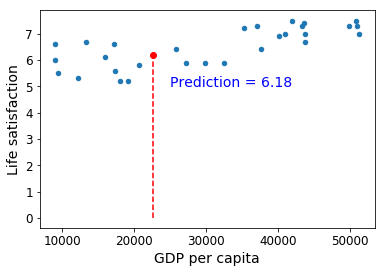

In [39]:
# Prepare the data
import sklearn.linear_model

X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')

# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
cyprus_gdp_per_capita = gdp_per_capita.loc["Cyprus"]["GDP per capita"]
cyprus_predicted_life_satisfaction = model.predict(cyprus_gdp_per_capita)[0][0]

print("Cyprus - GPD per capita: {0}, Predicted life satisfaction: {1}".format(cyprus_gdp_per_capita, cyprus_predicted_life_satisfaction))

plt.text(25000, 5.0, r"Prediction = {0:.2f}".format(cyprus_predicted_life_satisfaction), fontsize=14, color="b")
plt.plot([cyprus_gdp_per_capita, cyprus_gdp_per_capita], [0, cyprus_predicted_life_satisfaction], "r--")
plt.plot(cyprus_gdp_per_capita, cyprus_predicted_life_satisfaction, "ro")

plt.show()

In [16]:
t0, t1 = model.intercept_[0], model.coef_[0][0]
t0, t1

(5.295521405997438, 3.935525462329292e-05)

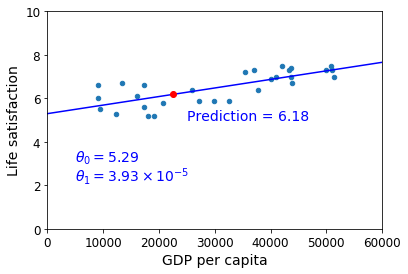

In [64]:
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.axis([0, 60000, 0, 10])
X=np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1*X, "b")
plt.text(5000, 3.1, r"$\theta_0 = 5.29$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 3.93 \times 10^{-5}$", fontsize=14, color="b")

plt.text(25000, 5.0, r"Prediction = {0:.2f}".format(cyprus_predicted_life_satisfaction), fontsize=14, color="b")
plt.plot(cyprus_gdp_per_capita, cyprus_predicted_life_satisfaction, "ro")

plt.show()